# LetsGrowMore DataScience Internship

# Name: Pooja Pathak
# Title: Iris Flower Classification ML Project
# Batch: March

# Data Collection


In [1]:
# Importing Libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Reading Dataset

In [2]:
data = pd.read_csv('/content/iris.data')
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [3]:
data.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [4]:
columns = ['sepal_length','sepal_width','petal_width','petal_length','species']
data.columns = columns
data.head()

,sepal_length,sepal_width,petal_width,petal_length,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


# Understanding The Data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_width   149 non-null    float64
 3   petal_length  149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
data.describe()

,sepal_length,sepal_width,petal_width,petal_length
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.shape

(149, 5)

# Checking The Null Values

In [8]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_width     0
petal_length    0
species         0
dtype: int64

# Data Visualization

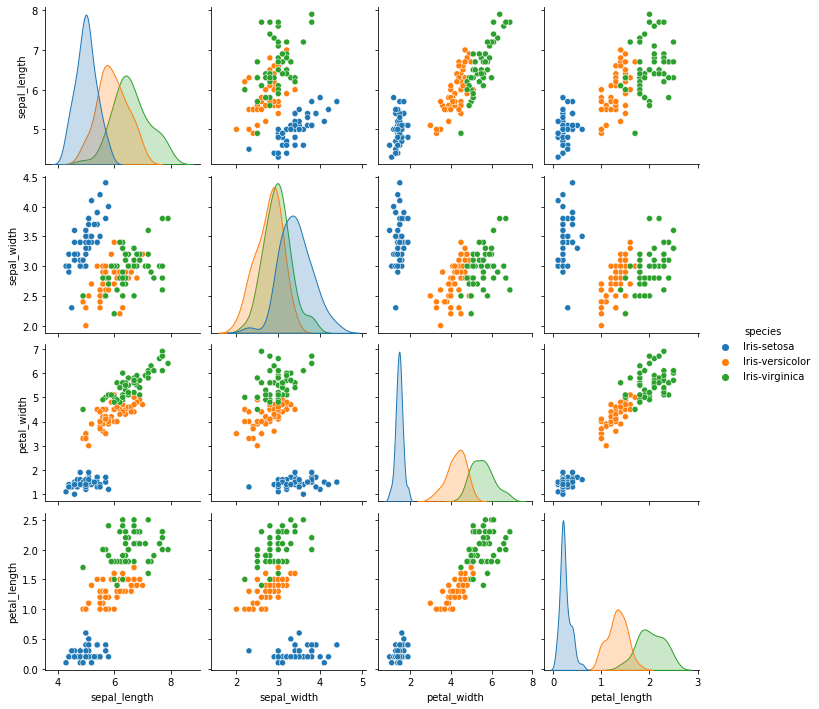

In [9]:
sns.pairplot(data, hue = 'species')

**Box Plot**

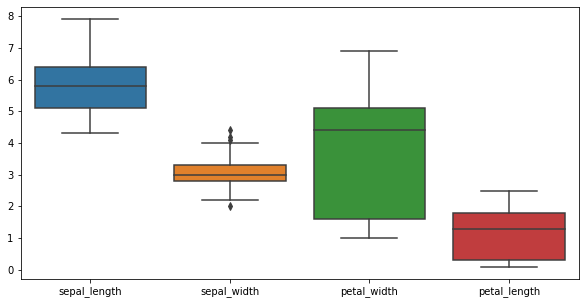

In [10]:
plt.figure(figsize =(10,5))
sns.boxplot(data=data)
plt.show()

**Histogram**

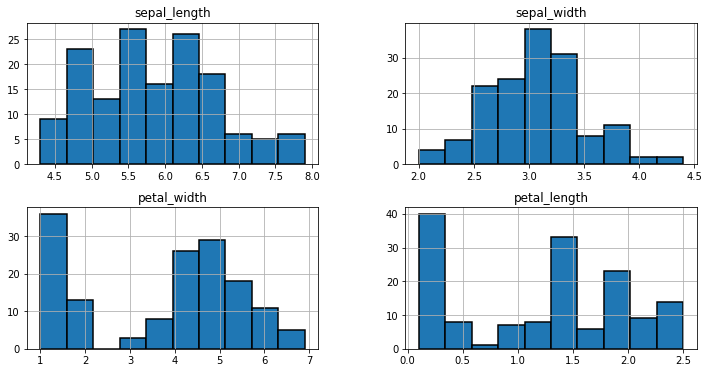

In [11]:
np = data
np.hist(edgecolor='black', linewidth=1.5)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

To show how the data is represent we are using correlation function and then represent them by using Heatmap

In [12]:
cor = data.corr()
cor

,sepal_length,sepal_width,petal_width,petal_length
sepal_length,1.000000,-0.103784,0.871283,0.816971
sepal_width,-0.103784,1.000000,-0.415218,-0.350733
petal_width,0.871283,-0.415218,1.000000,0.962314
petal_length,0.816971,-0.350733,0.962314,1.000000


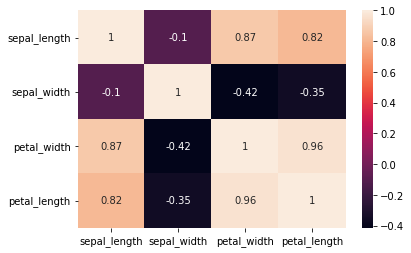

In [13]:
sns.heatmap(cor , annot = True)
plt.show()

# Data Transformation

Machine learning is not accpt the categorical values soo that transforming with label encoder

In [14]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])
data.head()

,sepal_length,sepal_width,petal_width,petal_length,species
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


In [16]:
x = data.iloc[:,:4]
y = data.iloc[:,-1]

In [17]:
x.head()

,sepal_length,sepal_width,petal_width,petal_length
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [18]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

# Model 

Scikit-learn’s train_test_split function allow us to shuffle and split the dataset in a single line. The function takes a sequence of arrays (the arrays must be of the same length) and options to specify how to split the arrays. By default, the function extracts 75% of the rows in the arrays as the training set while the remaining 25% of rows is declared as the test set.

Deciding how much data you want to put into the training and the test set respectively is somewhat arbitrary, but using a test set containing 25% of the data is a good rule of thumb. 

The function also allow us to control the shuffling applied to the data before applying the split with the option random_state, this ensures reproducible results.

x is having all the dependent variables
y is having independent variables

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [20]:
print(x_train.shape)
print(y_train.shape)

(119, 4)
(119,)


In [21]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.77      1.00      0.87        10
           2       1.00      0.62      0.77         8

    accuracy                           0.90        30
   macro avg       0.92      0.88      0.88        30
weighted avg       0.92      0.90      0.89        30

[[12  0  0]
 [ 0 10  0]
 [ 0  3  5]]


In [22]:
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 0.9


For this model we get accuracy on the test dataset is 0.90 , which means the model made the rght predicition for 90% of the iris dataset.

We can expect the model to be correct 90% of the time for predicting the species of new iries